In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [4]:
model = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
y_preds = model.predict(X_test)

In [5]:
model.score(X_train, y_train)

1.0

In [6]:
model.score(X_test, y_test)

0.819672131147541

In [7]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

linear_scv = LinearSVC(dual="auto").fit(X_train, y_train)
linear_scv.score(X_test, y_test)

0.8032786885245902

In [8]:
# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier().fit(X_train, y_train)
nbrs.score(X_test, y_test)

0.6721311475409836

In [9]:
# Import SVC from sklearn's svm module
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.5901639344262295

In [10]:
# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
logistic_reg.score(X_test, y_test)

0.7868852459016393

In [11]:
score_dict = {
    "RandomForestClassifier": RandomForestClassifier(),
    "LinearSVC": LinearSVC(dual="auto"),
    "KneighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
}

results_dict = {}

for name, model in score_dict.items():
    model.fit(X_train, y_train)
    results_dict[name] = model.score(X_test, y_test)
    
    
print(results_dict)

{'RandomForestClassifier': 0.819672131147541, 'LinearSVC': 0.8032786885245902, 'KneighborsClassifier': 0.6721311475409836, 'SVC': 0.5901639344262295, 'LogisticRegression': 0.7868852459016393}


In [12]:
results_df = pd.DataFrame(data=results_dict.values(), index=results_dict.keys(), columns=["Accuracy"])
results_df

,Accuracy
RandomForestClassifier,0.819672
LinearSVC,0.803279
KneighborsClassifier,0.672131
SVC,0.590164
LogisticRegression,0.786885


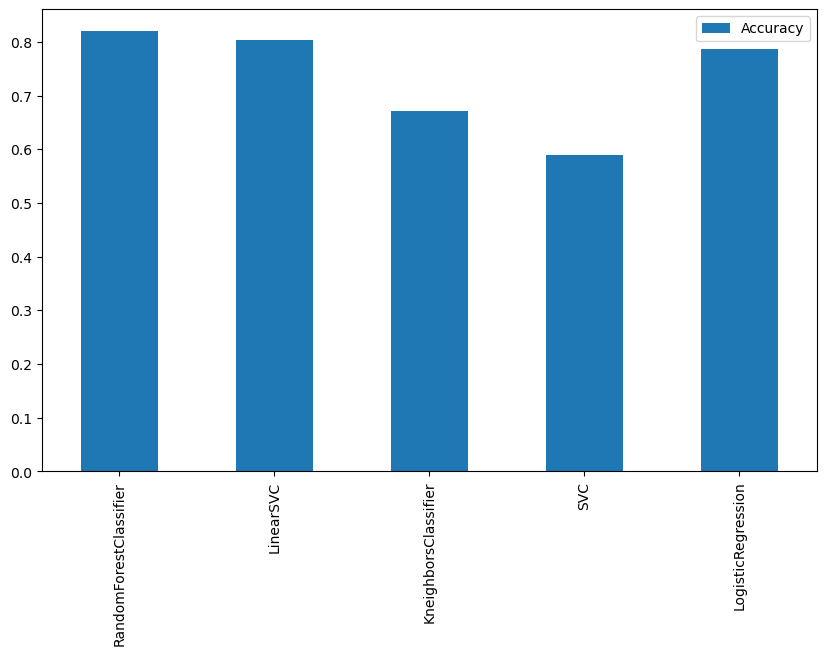

In [13]:
results_df.plot.bar(figsize=(10, 6));

In [14]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "max_iter": [6000, 7000, 6500],
    "random_state": [25, 30, 35, 40,],
}

In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7868852459016393

In [17]:
rs_log_reg = RandomizedSearchCV(log_reg, log_reg_grid, cv=5, n_iter=20, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [18]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

In [19]:
rs_log_reg.best_params_

{'random_state': 30, 'max_iter': 6000, 'C': 0.615848211066026}